# Importar libreria requeridas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# NLTK 
import nltk
from nltk.tokenize import wordpunct_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#nltk.download()
nltk.download('omw-1.4')
nltk.download('stopwords')

# data visual
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# string proccessing
import re
import string


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pdega\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pdega\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('../2. Analisis Exploratorio de datos+Ingenieria de caracteristicas/comentarios_sin_emojis.csv')
df.head(20)

,Text,IsToxic
0,people step case nt people situation lump m...,False
1,Law enforcement trained shoot apprehend trai...,True
2,nt reckon black lives matter banners held whit...,True
3,large number people like police officers calle...,False
4,Arab dude absolutely right shot extra time S...,False
5,people facebook ties isis terrorist groups ...,True
6,Check tube post Black man goes epic rant Fergu...,True
7,LOVE pussy Staten Island spit cop LOVE happen ...,True
8,agree protestor,False
9,mike browns father boooshit,True


# Preprocesado --> Normalización y limpieza

<h5>Se realiza la limpieza y normalización de los comentarios de la columna Text en las siguientes fases:</h5>
<ol>
    <li><b>Eliminación de las stopwords:</b> con la clase stopwords de la libreria nltk: Las palabras vacías o stopwords son palabras en cualquier idioma o corpus que ocurren con frecuencia. Nno aportan ninguna información adicional o valiosa al texto que las contiene. Palabras como a, they, the, is, an, etc. generalmente se consideran palabras vacías.</li>
    <li><b>Eliminación de carácteres pocos significativos:</b> Con metodo sub de la clase re(proporciona operaciones de coincidencia de expresiones regulares).El método sub retorna la cadena obtenida reemplazando las ocurrencias no superpuestas del pattern («patrón») pasado en el primer parametro en la string (tercer parametro) por el reemplazo indicado en el segundo parametro.</li>
      <li><b>Lematización:</b> Con metodo lemmatize de la clase WordLemmatizer de la libreria nltk.La lematización es un proceso lingüístico que consiste en, dada una forma flexionada, hallar el lema correspondiente. El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra. Es decir, el lema de una palabra es la palabra que nos encontraríamos como entrada en un diccionario tradicional: singular para sustantivos, masculino singular para adjetivos, infinitivo para verbos.</li>
     <li><b>Tokenización:</b> Con metodo wordtokenizer de la libreria nltk.La tokenización consiste en dividir un texto en entidades más pequeñas llamadas tokens.</li>
         <li><b>Normalización:</b> estandarización de las palabras de los comentarios.En este caso se convierten todas las palabras a minúsculas</li>
    
</ol>

### Stopwords

In [4]:
english_stopwords = stopwords.words('english')
english_stopwords.append('nt')
# Resta de conjuntos : stopwords sin los elementos del segungo conjunto set
stopwords = set(english_stopwords) - set(['i', 'he', 'she', 'you', 'me', 'we', 'us',
                                                   'this', 'them', 'that', 'those', 'her', 'his'])

### Lematizacion

In [5]:
wnl = WordNetLemmatizer()

#### Metodo lemmatize() de la clase WordNetLemmatizer de la librería NLTK

Recibe 2 parametros: texto a lemmatizar y pos.
El parámetro pos es la etiqueta de la parte del discurso a lematizar.
Las opciones válidas son `"n"` para sustantivos, `"v"` para verbos, `"a"` para adjetivos, `"r"` para adverbios y `"s"` para adjetivos satélite.

In [6]:
def lematiza_nombres(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token)
        a.append(lemmetized_word)
    return a

def lematiza_verbos(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token, pos='v')
        a.append(lemmetized_word)
    return a

def lematiza_adjetivos(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token,pos='a')
        a.append(lemmetized_word)
    return a

def lematiza_adverbios(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token, pos='r')
        a.append(lemmetized_word)
    return a

def lematiza_adj_satelites(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token,pos='s')
        a.append(lemmetized_word)
    return a

### Normalización --> Eliminación de caracteres poco significativos y convertir a minúsculas los comentarios

In [7]:
def eliminar_caracteres(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub('(\\\\u([a-z]|[0-9])+)', ' ', text)
    text = re.sub(r'https|http?:\/\/\S+', '', text)
    return text


In [8]:
def minusculas(text):
    text = text.lower()
    return text

In [9]:
# Convierte lista de strings en una cadena de strings
def list_to_strs(text):
    return ' '.join(text)


In [10]:
# Normalizacion y limpieza 
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df['Text'] = df['Text'].apply(eliminar_caracteres)
df['Text'] = df['Text'].apply(minusculas)
# Tokenización y lematización
df['Text'] = df['Text'].apply(word_tokenize)
df['Text'] = df['Text'].apply(lematiza_nombres)
df['Text'] = df['Text'].apply(lematiza_verbos)
df['Text'] = df['Text'].apply(lematiza_adjetivos)
df['Text'] = df['Text'].apply(lematiza_adverbios)
df['Text'] = df['Text'].apply(lematiza_adj_satelites)
df['Text'] = df['Text'].apply(list_to_strs)

In [11]:
df['Text']

0      people step case people situation lump mess ma...
1      law enforcement train shoot apprehend train sh...
2      reckon black life matter banner hold white cun...
3      large number people like police officer call c...
4      arab dude absolutely right shoot extra time sh...
                             ...                        
994                       remember send national defence
995    stats represent problem race bait attitude cri...
996                   quote mother wow hit hard accurate
997                                         video racist
998                              god narrator annoy lisp
Name: Text, Length: 999, dtype: object

##  Vectorización de palabras

In [20]:
#sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer


### Mezcla aleatoria de los registros del dataframe

In [21]:
## Hipotesis: mezclamos el df por sesgos humanos a la hora de insertar registros o comentarios que son
## sugestionados por el sig o ant comentario
df = shuffle(df, random_state = 42)
df

,Text,IsToxic
633,white racist comment section glad white exterm...,1
904,attack police officer steal store expect,0
826,bamshe say,0
697,hilarious see moron hit car,1
976,lmao agree riot violent protest good stuff,0
...,...,...
780,dear peggy mother run president,0
118,good cnn anchor see,0
288,shoot time inside right arm palm hand hand sur...,0
368,good society great good michael brown go rail ...,1


### Vectorizacion: ajuste y escalado/normalizacion de los tokens

##### Se crea un vectorizador utilizando un algoritmo Tfidf. Posteriormente se le pasa al vectorizador los datos con los que deseamos trabajar. Ésto nos creará una matriz dispersa

In [22]:
# Inicializacion de constructores de las 2 técnicas de vectorizacion: CountVectorizer() y TfidfTransformer()
vectorizer = CountVectorizer()
tfid = TfidfTransformer()

In [23]:
#Ajuste y escalado (normalizacion). Finalmente Pasamos a array nuestro vectores a nuestro modelo
transformer1= vectorizer.fit_transform(df['Text'])
transformer2=tfid.fit(transformer1)

In [24]:
df['IsToxic'] = df['IsToxic'].replace({True: 1, False: 0})
print(df['IsToxic'])

633    1
904    0
826    0
697    1
976    0
      ..
780    0
118    0
288    0
368    1
221    1
Name: IsToxic, Length: 999, dtype: int64


# Evaluacion de modelos

##### Se evaluaran los siguientes algoritmos 
<ol>
    <li>Regresión logística</li>
    <li>Suport Vector Machine</li>
    <li>Bayes Naive<ol>
        <li>Regresión multinomial</li>
        <li>Gausiano</li>
        </ol> </li>
    <li>Arboles de decision<ol>
        <li>Random Forest</li>
        <li>Decision Tree Clasiffier</li>
        </ol> </li>
    <li>Algoritmos de emsembre<ol>
        <li>Extreme Gradient Boosting o  XGBOOST</li>
        <li>LightGBM</li>
        <li>Catboost</li>
        </ol> </li>
 </ol>
 
Para cada modelo:
<ol>
    <li>se creará el pipeline de datos.
<b>Pipeline:conjunto de pasos o fases y las tecnologías involucradas en un proceso de movimiento o procesamiento de datos.</b>Un pipeline de M.L es una forma de codificar y automatizar el flujo de trabajo necesario para producir un modelo de aprendizaje automático. Los canales de aprendizaje automático consisten en múltiples pasos secuenciales que hacen todo, desde la extracción de datos y el preprocesamiento hasta el entrenamiento del modelo y la implementación.</li>
    <li>Se entrena modelo con datos de entrenamiento</li>
     <li>Se realiza predicción con datos de validacion y con datos de entrenamiento para verificar overfitting</li>
    <li>Se visualizan las siguientes metricas del modelo: precision, accuracy y f1, ademas de visualizar el overfitting del modelo</li>
</ol>

In [25]:
from sklearn.pipeline import Pipeline
from sklearn import metrics

#### Separación de datos de entrenamiento y validación

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["IsToxic"], test_size=0.2, random_state=42)

#### Visualizacion de metricas

In [27]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, f1_score,precision_score,accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def show_metrics(predicciones_test, resultado_test,predicciones_train,resultado_train):
    # Metricas de test
   # Score_auc = roc_auc_score(y_true = predicciones_test, y_score = resultado_test)
    f1 = f1_score(y_true = predicciones_test, y_pred = resultado_test)
    precision=precision_score(y_true = predicciones_test, y_pred = resultado_test)
    accuracy= accuracy_score(y_true = predicciones_test, y_pred = resultado_test)
    #print(f'Score_auc:{Score_auc}')
    print(f'f1_score:{f1}')
    print(f'precision:{precision}')
    print(f'accuracy:{accuracy}')
    print()
    # Metricas train
    print("METRICAS TRAIN")
    #Score_auc_train = roc_auc_score(y_true = predicciones_train, y_score = resultado_train)
    f1_train = f1_score(y_true = predicciones_train, y_pred = resultado_train)
    precision_train=precision_score(y_true = predicciones_train, y_pred = resultado_train)
    accuracy_train= accuracy_score(y_true = predicciones_train, y_pred = resultado_train)
    #print(f'Score_auc train:{Score_auc_train}')
    print(f'f1_score train:{f1_train}')
    print(f'precision train:{precision_train}')
    print(f'accuracy train:{accuracy_train}')
    
    # Overfitting
    print()
    print("Overfitting")
    #print(f'Score_auc overfitting: {((Score_auc_train-Score_auc)*100)/Score_auc} %')
    print(f'f1_score overfitting:{((f1_train-f1)*100)/f1} %')
    print(f'precision overfitting:{((precision_train-precision)*100)/precision} %')
    print(f'accuracy overfitting:{((accuracy_train-accuracy)*100)/accuracy} %')
    
    ## MAtriz de confusión
    print(classification_report(predicciones_test,resultado_test))
    matriz_confusion = confusion_matrix(y_true = predicciones_test, y_pred = resultado_test)
    matriz_confusion_df = pd.DataFrame(matriz_confusion)
    label = ['positivo', 'negativo']
       
    matriz_confusion_df.columns= label
    matriz_confusion_df.index = label

    # Y nombramos lo que son las columnas y las filas:
    matriz_confusion_df.columns.name = "Predicho"
    matriz_confusion_df.index.name = "Real"

    plt.figure(figsize=(8,4))
    sns.heatmap(matriz_confusion_df,                     
            annot=True,
            fmt="d",
            cmap="Blues")

### LogisticRegression

In [51]:
from sklearn.linear_model import LogisticRegression

In [43]:
pipeline_lr= Pipeline([
    ('bow', vectorizer),  # cadenas a cuentas enteras de tokens
    ('tfidf', transformer2),  # integer counts de pesos TF-IDF scores
    ('classifier', LogisticRegression())])
pipeline_lr.fit(X_train,y_train)
predictionsLR = pipeline_lr.predict(X_test)
predictionsLR_train = pipeline_lr.predict(X_train)

Metricas de Logistic Regression

f1_score:0.6547619047619048
precision:0.5729166666666666
accuracy:0.71

METRICAS TRAIN
f1_score train:0.9235127478753541
precision train:0.8907103825136612
accuracy train:0.932415519399249

Overfitting
f1_score overfitting:41.04558331187226 %
precision overfitting:55.46944858420269 %
accuracy overfitting:31.326129492851983 %
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       128
           1       0.57      0.76      0.65        72

    accuracy                           0.71       200
   macro avg       0.70      0.72      0.70       200
weighted avg       0.74      0.71      0.72       200



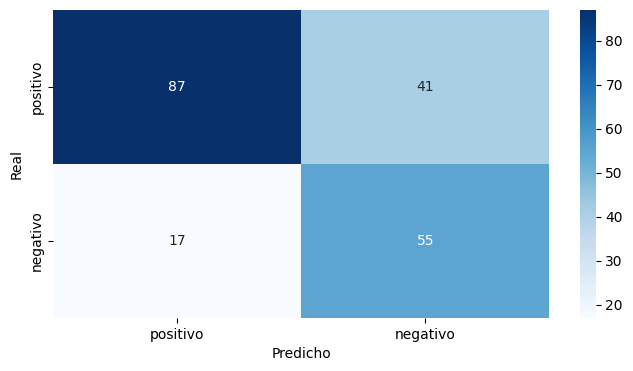

In [44]:
print("Metricas de Logistic Regression")
print()
show_metrics(predictionsLR,y_test,predictionsLR_train,y_train)

### Regresión multinomial (MultinomialNB)

In [46]:
from sklearn.naive_bayes import MultinomialNB
pipeline_MN= Pipeline([
    ('bow', vectorizer),  # cadenas a cuentas enteras de tokens
    ('tfidf', transformer2),  # integer counts de pesos TF-IDF scores
    ('classifier', MultinomialNB())])
pipeline_MN.fit(X_train,y_train)
predictionsMN = pipeline_MN.predict(X_test)
predictionsMN_train = pipeline_MN.predict(X_train)

Metricas de MultinomialNB

f1_score:0.625
precision:0.5729166666666666
accuracy:0.67

METRICAS TRAIN
f1_score train:0.9495798319327732
precision train:0.9262295081967213
accuracy train:0.9549436795994993

Overfitting
f1_score overfitting:51.932773109243705 %
precision overfitting:61.66915052160955 %
accuracy overfitting:42.52890740291034 %
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       120
           1       0.57      0.69      0.62        80

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.68      0.67      0.67       200



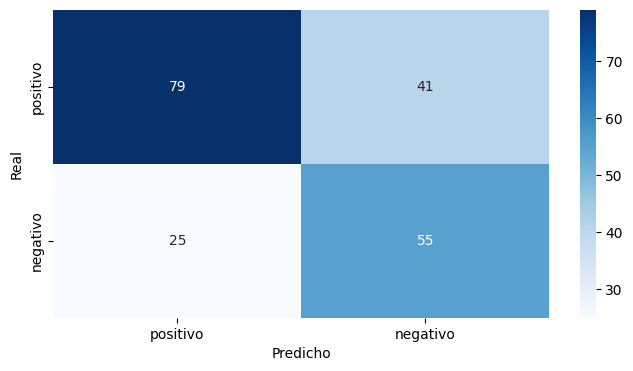

In [75]:
print("Metricas de MultinomialNB")
print()
show_metrics(predictionsMN,y_test,predictionsMN_train,y_train)

### Suport Vector Machine Clasiffier

In [48]:
from sklearn.svm import SVC

In [49]:
pipeline_SVC= Pipeline([
    ('bow', vectorizer),  # cadenas a cuentas enteras de tokens
    ('tfidf', transformer2),  # integer counts de pesos TF-IDF scores
    ('classifier', SVC())])
pipeline_SVC.fit(X_train,y_train)
predictionsSVC = pipeline_SVC.predict(X_test)
predictionsSVC_train = pipeline_SVC.predict(X_train)

Metricas de SVC

f1_score:0.6385542168674698
precision:0.5520833333333334
accuracy:0.7

METRICAS TRAIN
f1_score train:0.9972752043596731
precision train:1.0
accuracy train:0.9974968710888611

Overfitting
f1_score overfitting:56.17706030538278 %
precision overfitting:81.1320754716981 %
accuracy overfitting:42.49955301269445 %
              precision    recall  f1-score   support

           0       0.84      0.67      0.74       130
           1       0.55      0.76      0.64        70

    accuracy                           0.70       200
   macro avg       0.69      0.71      0.69       200
weighted avg       0.74      0.70      0.71       200



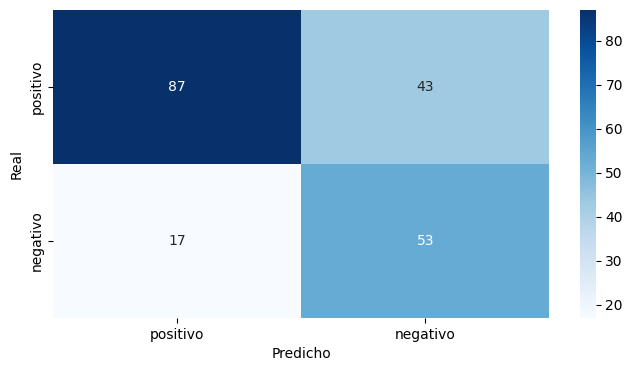

In [76]:
print("Metricas de SVC")
print()
show_metrics(predictionsSVC,y_test,predictionsSVC_train,y_train)

### GaussianNB

In [63]:
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import csr_matrix

In [68]:
from sklearn.base import BaseEstimator
from scipy.sparse import issparse

class DenseTransformer(BaseEstimator):
    def __init__(self, return_copy=True):
        self.return_copy = return_copy
        self.is_fitted = False

    def transform(self, X, y=None):
        if issparse(X):
            return X.toarray()
        elif self.return_copy:
            return X.copy()
        else:
            return X

    def fit(self, X, y=None):
        self.is_fitted = True
        return self

    def fit_transform(self, X, y=None):
        return self.transform(X=X, y=y)


In [70]:
from sklearn.pipeline import make_pipeline
pipeline_GNB= make_pipeline(
    vectorizer,
    DenseTransformer(),
    GaussianNB()
)

pipeline_GNB.fit(X_train,y_train)
predictionsGNB = pipeline_GNB.predict(X_test)
predictionsGNB_train = pipeline_GNB.predict(X_train)

Metricas de Logistic GaussianNB

f1_score:0.6101694915254237
precision:0.75
accuracy:0.54

METRICAS TRAIN
f1_score train:0.8948655256723717
precision train:1.0
accuracy train:0.8923654568210263

Overfitting
f1_score overfitting:46.65851670741648 %
precision overfitting:33.333333333333336 %
accuracy overfitting:65.25286237426413 %
              precision    recall  f1-score   support

           0       0.35      0.60      0.44        60
           1       0.75      0.51      0.61       140

    accuracy                           0.54       200
   macro avg       0.55      0.56      0.52       200
weighted avg       0.63      0.54      0.56       200



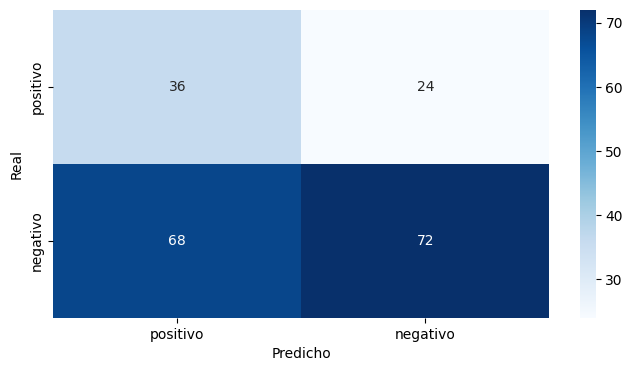

In [77]:
print("Metricas de Logistic GaussianNB")
print()
show_metrics(predictionsGNB,y_test,predictionsGNB_train,y_train)

### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
pipeline_RF= Pipeline([
    ('bow', vectorizer),  # cadenas a cuentas enteras de tokens
    ('tfidf', transformer2),  # integer counts de pesos TF-IDF scores
    ('classifier', RandomForestClassifier())])
pipeline_RF.fit(X_train,y_train)
predictionsRF = pipeline_RF.predict(X_test)
predictionsRF_train = pipeline_RF.predict(X_train)

Metricas de Random Forest

f1_score:0.6909090909090908
precision:0.59375
accuracy:0.745

METRICAS TRAIN
f1_score train:1.0
precision train:1.0
accuracy train:1.0

Overfitting
f1_score overfitting:44.73684210526318 %
precision overfitting:68.42105263157895 %
accuracy overfitting:34.22818791946309 %
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       131
           1       0.59      0.83      0.69        69

    accuracy                           0.74       200
   macro avg       0.74      0.76      0.74       200
weighted avg       0.78      0.74      0.75       200



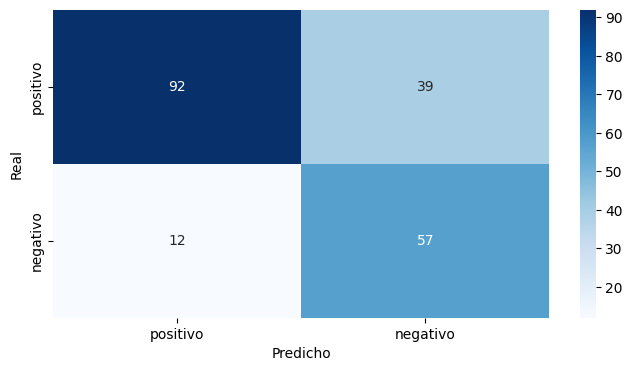

In [74]:
print("Metricas de Random Forest")
print()
show_metrics(predictionsRF,y_test,predictionsRF_train,y_train)

### Tree Clasiffier

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
pipeline_TC= Pipeline([
    ('bow', vectorizer),  # cadenas a cuentas enteras de tokens
    ('tfidf', transformer2),  # integer counts de pesos TF-IDF scores
    ('classifier',  DecisionTreeClassifier())])
pipeline_TC.fit(X_train,y_train)
predictionsTC = pipeline_TC.predict(X_test)
predictionsTC_train = pipeline_TC.predict(X_train)

Metricas de Tree clasiffier

f1_score:0.6804123711340205
precision:0.6875
accuracy:0.69

METRICAS TRAIN
f1_score train:1.0
precision train:1.0
accuracy train:1.0

Overfitting
f1_score overfitting:46.96969696969698 %
precision overfitting:45.45454545454545 %
accuracy overfitting:44.92753623188407 %
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       102
           1       0.69      0.67      0.68        98

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200



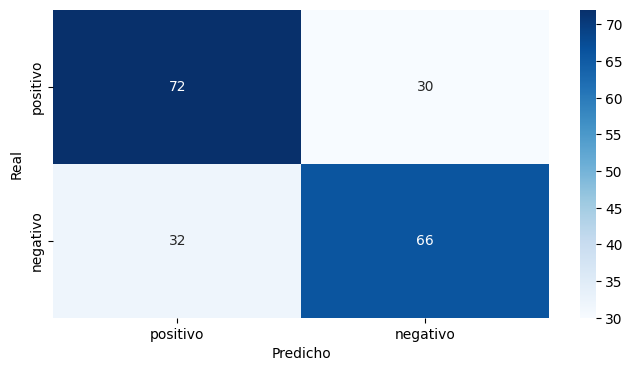

In [80]:
print("Metricas de Tree clasiffier")
print()
show_metrics(predictionsTC,y_test,predictionsTC_train,y_train)

### XGBoost

In [ ]:
from xgboost import XGBClassifier

In [85]:
pipeline_XG= Pipeline([
    ('bow', vectorizer),  # cadenas a cuentas enteras de tokens
    ('tfidf', transformer2),  # integer counts de pesos TF-IDF scores
    ('classifier',  XGBClassifier())])
pipeline_XG.fit(X_train,y_train)
predictionsXG = pipeline_XG.predict(X_test)
predictionsXG_train = pipeline_XG.predict(X_train)

Metricas de XGBoost

f1_score:0.6666666666666666
precision:0.6354166666666666
accuracy:0.695

METRICAS TRAIN
f1_score train:0.9381294964028777
precision train:0.8907103825136612
accuracy train:0.9461827284105131

Overfitting
f1_score overfitting:40.71942446043166 %
precision overfitting:40.17737167428111 %
accuracy overfitting:36.14139977129686 %
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       113
           1       0.64      0.70      0.67        87

    accuracy                           0.69       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.70      0.69      0.70       200



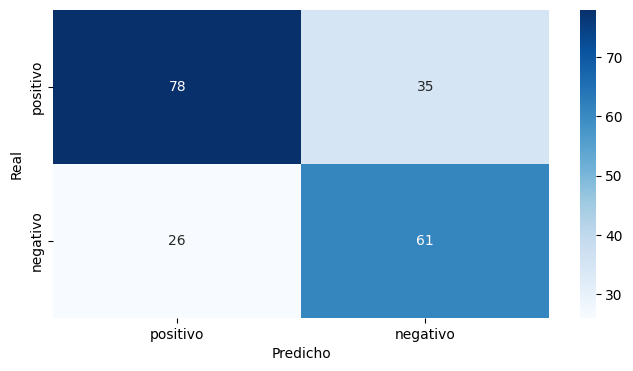

In [83]:
print("Metricas de XGBoost")
print()
show_metrics(predictionsXG,y_test,predictionsXG_train,y_train)

### CatBoost

##### Como las metricas de anteriores modelos, tienen valores muy alto de overffiting , en este caso se realizan ajuste de 4 hiperparametros del modelo, para verificar si mejora la métrica de overfitting:
<ol>
    <li>iterations: Por defecto son 1000 iteracciones (1000 arboles), pero lo reduzco a 100 iteracciones</li>
    <li>learning_rate: Como se observa overffitting o sobreajuste , voy a reducir el valor de la tasa de aprendizaje </li>
     <li>loss_function: La métrica a utilizar en el entrenamiento.</li>
     <li>eval_metric: La métrica utilizada para la detección de sobreajuste. En este caso se usa la metrica AUC,ya que cuanto mayor es su valor mejor es el rendimiento de un clasificador binario para una tarea de clasificación dada </li>
 </ol>

In [28]:
from catboost import CatBoostClassifier

In [114]:
pipeline_CB= Pipeline([
    ('bow', vectorizer),  
    ('tfidf', transformer2), 
    ('classifier',CatBoostClassifier(iterations=100, learning_rate=0.001, loss_function='Logloss', eval_metric='AUC'))])
pipeline_CB.fit(X_train,y_train)
predictionsCB = pipeline_CB.predict(X_test)
predictionsCB_train = pipeline_CB.predict(X_train)

0:	total: 40.8ms	remaining: 4.03s
1:	total: 76.8ms	remaining: 3.76s
2:	total: 113ms	remaining: 3.65s
3:	total: 149ms	remaining: 3.57s
4:	total: 185ms	remaining: 3.51s
5:	total: 221ms	remaining: 3.47s
6:	total: 281ms	remaining: 3.73s
7:	total: 321ms	remaining: 3.69s
8:	total: 359ms	remaining: 3.63s
9:	total: 397ms	remaining: 3.57s
10:	total: 434ms	remaining: 3.51s
11:	total: 470ms	remaining: 3.45s
12:	total: 525ms	remaining: 3.51s
13:	total: 563ms	remaining: 3.46s
14:	total: 600ms	remaining: 3.4s
15:	total: 636ms	remaining: 3.34s
16:	total: 673ms	remaining: 3.29s
17:	total: 709ms	remaining: 3.23s
18:	total: 762ms	remaining: 3.25s
19:	total: 800ms	remaining: 3.2s
20:	total: 860ms	remaining: 3.23s
21:	total: 993ms	remaining: 3.52s
22:	total: 1.05s	remaining: 3.52s
23:	total: 1.1s	remaining: 3.48s
24:	total: 1.15s	remaining: 3.44s
25:	total: 1.2s	remaining: 3.42s
26:	total: 1.25s	remaining: 3.39s
27:	total: 1.29s	remaining: 3.32s
28:	total: 1.33s	remaining: 3.26s
29:	total: 1.37s	remaining

f1_score:0.44961240310077516
precision:0.3020833333333333
accuracy:0.645

METRICAS TRAIN
f1_score train:0.4513457556935818
precision train:0.2978142076502732
accuracy train:0.6683354192740926

Overfitting
f1_score overfitting:0.3855215249518258 %
precision overfitting:-1.4132278123233413 %
accuracy overfitting:3.61789446109962 %
              precision    recall  f1-score   support

           0       0.96      0.60      0.74       167
           1       0.30      0.88      0.45        33

    accuracy                           0.65       200
   macro avg       0.63      0.74      0.59       200
weighted avg       0.85      0.65      0.69       200



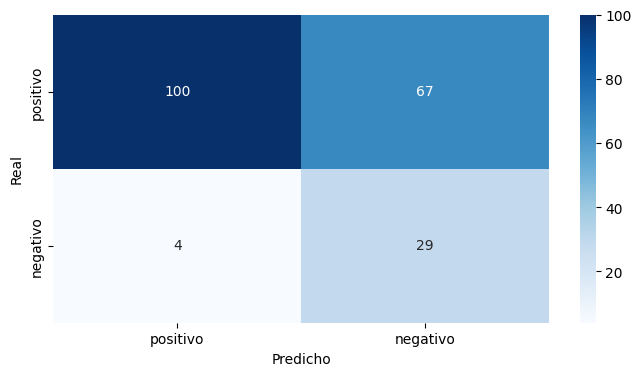

In [116]:
show_metrics(predictionsCB,y_test,predictionsCB_train,y_train)

### LightGBM

In [109]:
from lightgbm import LGBMClassifier

In [112]:
pipeline_LGBM= Pipeline([
    ('bow', vectorizer),  # cadenas a cuentas enteras de tokens
    ('tfidf', transformer2),  # integer counts de pesos TF-IDF scores
    ('classifier',LGBMClassifier())])
pipeline_LGBM.fit(X_train,y_train)
predictionsLGBM = pipeline_CB.predict(X_test)
predictionsLGBM_train = pipeline_LGBM.predict(X_train)

f1_score:0.5714285714285715
precision:0.4166666666666667
accuracy:0.7

METRICAS TRAIN
f1_score train:0.8428781204111601
precision train:0.7841530054644809
accuracy train:0.8660826032540676

Overfitting
f1_score overfitting:47.50367107195299 %
precision overfitting:88.1967213114754 %
accuracy overfitting:23.72608617915252 %
              precision    recall  f1-score   support

           0       0.96      0.64      0.77       156
           1       0.42      0.91      0.57        44

    accuracy                           0.70       200
   macro avg       0.69      0.78      0.67       200
weighted avg       0.84      0.70      0.73       200



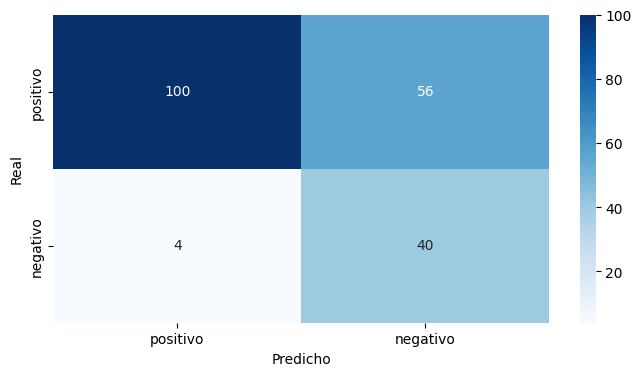

In [113]:
show_metrics(predictionsLGBM,y_test,predictionsLGBM_train,y_train)

## Conclusión

<b>Al haberse evaluado las metricas de los anteriores modelos, se nota que , independientemente de las métricas, se observan altos valores de overfitting, indicando que todos los modelos tienden al sobreajuste inicialmente.  </b>

<b>Sin embargo, al realizar el ajuste de hiperparámetros del modelo Catboost con los parametros de iterations, learning_rate y eval_metrics se ha mejorado considerablemente sus metricas de overfitting (menores al 3%), manteniendo una metricas aceptables de precision , accuracy y f1. </b>
<b>Ha habido una disminucion de la precision del modelo para los mensajes de odio (Cuantos mensajes de odio es capaz de detectar el modelo) al 30 %.
Una vez solucionado el problema del overfitting del modelos, el enfoque será en mejorar la precision y metricas evaluables del modelo elegido.</b>
    
<b>De esta etapa, selecciono el mejor modelo que se adapte al problema de negocio. EL modelo sleccionado es el algoritmo de ensemble: CatBoost</b>
<b>Se eligen los modelos de ensemble ya que consiste en construir un conjunto de modelos débiles en los que  los modelos se construyen  secuencialmente. Esto significa que el siguiente modelo aprenderá de los errores del modelo precedente, y luego se repitirá el proceso, aumentando el número de modelos débiles. De esta forma, obtendremos un modelo fuerte que puede generalizarse usando datos heterogéneos.</b>

#### Catboost es un algoritmo de ensemble que implementa la tecnica de gradient boosting -->  conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo. Las ventajas del catboost son las siguientes : Son capaces de seleccionar predictores de forma automática, requieren mucha menos limpieza y pre procesado de los datos en comparación a otros métodos de aprendizaje estadístico (por ejemplo, no requieren estandarización), no se ven muy influenciados por outliers,permiten identificar de forma rápida y eficiente las variables (predictores) más importantes y tienen buena escalabilidad (pueden aplicarse a conjuntos de datos con un elevado número de observaciones).





# Baseline model

In [35]:
vectorizer = CountVectorizer()
tfid = TfidfTransformer()
#Ajuste y escalado (normalizacion). Finalmente Pasamos a array nuestro vectores a nuestro modelo
X= vectorizer.fit_transform(X_train).toarray()
X=tfid.fit_transform(X).toarray()

X_test = vectorizer.transform(X_test)
X_test= tfid.transform(X_test).toarray()

In [51]:
baseline_model = CatBoostClassifier(iterations=1000, learning_rate=0.001, loss_function='Logloss', eval_metric='AUC') 
baseline_model.fit(X,y_train)

0:	total: 159ms	remaining: 2m 38s
1:	total: 268ms	remaining: 2m 13s
2:	total: 533ms	remaining: 2m 57s
3:	total: 720ms	remaining: 2m 59s
4:	total: 1.03s	remaining: 3m 24s
5:	total: 1.18s	remaining: 3m 15s
6:	total: 1.34s	remaining: 3m 9s
7:	total: 1.49s	remaining: 3m 4s
8:	total: 1.68s	remaining: 3m 4s
9:	total: 1.83s	remaining: 3m 1s
10:	total: 2.02s	remaining: 3m 1s
11:	total: 2.12s	remaining: 2m 54s
12:	total: 2.3s	remaining: 2m 54s
13:	total: 2.43s	remaining: 2m 51s
14:	total: 2.67s	remaining: 2m 55s
15:	total: 3.01s	remaining: 3m 5s
16:	total: 3.13s	remaining: 3m 1s
17:	total: 3.35s	remaining: 3m 3s
18:	total: 3.66s	remaining: 3m 8s
19:	total: 3.94s	remaining: 3m 12s
20:	total: 4.1s	remaining: 3m 11s
21:	total: 4.3s	remaining: 3m 11s
22:	total: 4.45s	remaining: 3m 9s
23:	total: 4.67s	remaining: 3m 9s
24:	total: 4.79s	remaining: 3m 6s
25:	total: 4.92s	remaining: 3m 4s
26:	total: 5.1s	remaining: 3m 3s
27:	total: 5.25s	remaining: 3m 2s
28:	total: 5.38s	remaining: 3m
29:	total: 5.55s	r

234:	total: 49.3s	remaining: 2m 40s
235:	total: 49.5s	remaining: 2m 40s
236:	total: 49.7s	remaining: 2m 39s
237:	total: 49.9s	remaining: 2m 39s
238:	total: 50s	remaining: 2m 39s
239:	total: 50.2s	remaining: 2m 39s
240:	total: 50.4s	remaining: 2m 38s
241:	total: 50.5s	remaining: 2m 38s
242:	total: 50.7s	remaining: 2m 38s
243:	total: 51s	remaining: 2m 37s
244:	total: 51.1s	remaining: 2m 37s
245:	total: 51.3s	remaining: 2m 37s
246:	total: 51.4s	remaining: 2m 36s
247:	total: 51.6s	remaining: 2m 36s
248:	total: 51.7s	remaining: 2m 35s
249:	total: 51.9s	remaining: 2m 35s
250:	total: 52.1s	remaining: 2m 35s
251:	total: 52.3s	remaining: 2m 35s
252:	total: 52.5s	remaining: 2m 34s
253:	total: 52.7s	remaining: 2m 34s
254:	total: 53.3s	remaining: 2m 35s
255:	total: 53.6s	remaining: 2m 35s
256:	total: 53.9s	remaining: 2m 35s
257:	total: 54.5s	remaining: 2m 36s
258:	total: 55s	remaining: 2m 37s
259:	total: 55.4s	remaining: 2m 37s
260:	total: 55.7s	remaining: 2m 37s
261:	total: 56s	remaining: 2m 37s


461:	total: 1m 28s	remaining: 1m 42s
462:	total: 1m 28s	remaining: 1m 42s
463:	total: 1m 28s	remaining: 1m 42s
464:	total: 1m 28s	remaining: 1m 41s
465:	total: 1m 28s	remaining: 1m 41s
466:	total: 1m 29s	remaining: 1m 41s
467:	total: 1m 29s	remaining: 1m 41s
468:	total: 1m 29s	remaining: 1m 41s
469:	total: 1m 29s	remaining: 1m 40s
470:	total: 1m 29s	remaining: 1m 40s
471:	total: 1m 29s	remaining: 1m 40s
472:	total: 1m 30s	remaining: 1m 40s
473:	total: 1m 30s	remaining: 1m 40s
474:	total: 1m 30s	remaining: 1m 39s
475:	total: 1m 30s	remaining: 1m 39s
476:	total: 1m 30s	remaining: 1m 39s
477:	total: 1m 30s	remaining: 1m 39s
478:	total: 1m 30s	remaining: 1m 38s
479:	total: 1m 30s	remaining: 1m 38s
480:	total: 1m 31s	remaining: 1m 38s
481:	total: 1m 31s	remaining: 1m 37s
482:	total: 1m 31s	remaining: 1m 37s
483:	total: 1m 31s	remaining: 1m 37s
484:	total: 1m 31s	remaining: 1m 37s
485:	total: 1m 31s	remaining: 1m 37s
486:	total: 1m 32s	remaining: 1m 36s
487:	total: 1m 32s	remaining: 1m 36s
4

688:	total: 2m 4s	remaining: 56s
689:	total: 2m 4s	remaining: 55.9s
690:	total: 2m 4s	remaining: 55.7s
691:	total: 2m 4s	remaining: 55.5s
692:	total: 2m 4s	remaining: 55.3s
693:	total: 2m 5s	remaining: 55.1s
694:	total: 2m 5s	remaining: 54.9s
695:	total: 2m 5s	remaining: 54.8s
696:	total: 2m 5s	remaining: 54.6s
697:	total: 2m 5s	remaining: 54.4s
698:	total: 2m 5s	remaining: 54.1s
699:	total: 2m 5s	remaining: 54s
700:	total: 2m 6s	remaining: 53.8s
701:	total: 2m 6s	remaining: 53.6s
702:	total: 2m 6s	remaining: 53.4s
703:	total: 2m 6s	remaining: 53.3s
704:	total: 2m 6s	remaining: 53.1s
705:	total: 2m 7s	remaining: 52.9s
706:	total: 2m 7s	remaining: 52.7s
707:	total: 2m 7s	remaining: 52.5s
708:	total: 2m 7s	remaining: 52.3s
709:	total: 2m 7s	remaining: 52.1s
710:	total: 2m 7s	remaining: 52s
711:	total: 2m 8s	remaining: 51.8s
712:	total: 2m 8s	remaining: 51.6s
713:	total: 2m 8s	remaining: 51.4s
714:	total: 2m 8s	remaining: 51.2s
715:	total: 2m 8s	remaining: 51.1s
716:	total: 2m 8s	remainin

919:	total: 2m 41s	remaining: 14s
920:	total: 2m 41s	remaining: 13.9s
921:	total: 2m 41s	remaining: 13.7s
922:	total: 2m 41s	remaining: 13.5s
923:	total: 2m 42s	remaining: 13.3s
924:	total: 2m 42s	remaining: 13.2s
925:	total: 2m 42s	remaining: 13s
926:	total: 2m 42s	remaining: 12.8s
927:	total: 2m 42s	remaining: 12.6s
928:	total: 2m 42s	remaining: 12.4s
929:	total: 2m 43s	remaining: 12.3s
930:	total: 2m 43s	remaining: 12.1s
931:	total: 2m 43s	remaining: 11.9s
932:	total: 2m 43s	remaining: 11.7s
933:	total: 2m 43s	remaining: 11.6s
934:	total: 2m 43s	remaining: 11.4s
935:	total: 2m 44s	remaining: 11.2s
936:	total: 2m 44s	remaining: 11s
937:	total: 2m 44s	remaining: 10.9s
938:	total: 2m 44s	remaining: 10.7s
939:	total: 2m 44s	remaining: 10.5s
940:	total: 2m 44s	remaining: 10.3s
941:	total: 2m 44s	remaining: 10.2s
942:	total: 2m 45s	remaining: 9.98s
943:	total: 2m 45s	remaining: 9.8s
944:	total: 2m 45s	remaining: 9.63s
945:	total: 2m 45s	remaining: 9.45s
946:	total: 2m 45s	remaining: 9.27s

f1_score:0.5323741007194245
precision:0.37755102040816324
accuracy:0.675

METRICAS TRAIN
f1_score train:0.5415860735009671
precision train:0.38461538461538464
accuracy train:0.7033792240300375

Overfitting
f1_score overfitting:1.7303570495059788 %
precision overfitting:1.8711018711018834 %
accuracy overfitting:4.204329485931474 %
              precision    recall  f1-score   support

           0       0.96      0.62      0.75       159
           1       0.38      0.90      0.53        41

    accuracy                           0.68       200
   macro avg       0.67      0.76      0.64       200
weighted avg       0.84      0.68      0.71       200



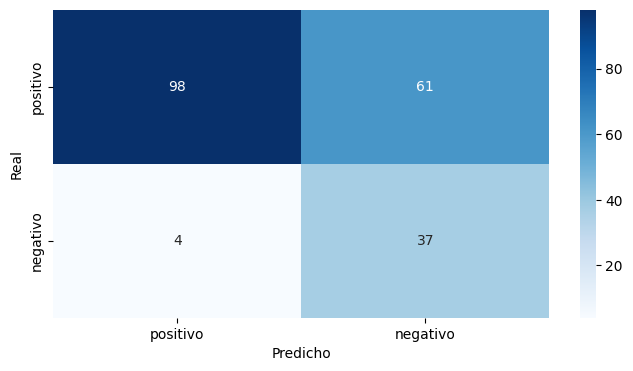

In [52]:
predictions_model = baseline_model.predict(X_test)
predictions_model_train = baseline_model.predict(X)
predictions_model
show_metrics(predictions_model,y_test,predictions_model_train,y_train)

In [40]:
import pickle

transformer_path = 'vectorizertfid_baseline.pkl'
pickle.dump(tfid , open(transformer_path, "wb"))
model_path = 'model_baseline.pkl'
pickle.dump(baseline_model , open(model_path, "wb"))